# Problem-
### Analyze the difficulty level of a particular course using clustering techniques
# Dataset-
### Bachelor of Computer Applications

In [24]:
import pandas as pd
dataset = pd.read_excel('dataset.xls')
dataset

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,318192,15432776,ZVA164,E,79.0,7.0,29.0,NaN,80.0,Bachelor of Technology (Mechanical Engineering),...,10.0,10.0,170,58,Day Scholar,South,Female,Hindi,Theory,UG
65531,318192,15432776,ZVA165,A,84.0,NaN,NaN,67.0,75.0,Bachelor of Technology (Mechanical Engineering),...,31.0,6.0,170,58,Day Scholar,South,Female,Hindi,Theory,UG
65532,318192,15432776,ZVA167,B+,69.0,20.0,70.0,NaN,80.0,Bachelor of Technology (Mechanical Engineering),...,1.0,1.0,170,58,Day Scholar,South,Female,Hindi,Theory,UG
65533,318192,15432776,ZVA168,A+,91.0,NaN,NaN,69.0,72.0,Bachelor of Technology (Mechanical Engineering),...,1.0,4.0,170,58,Day Scholar,South,Female,Hindi,Theory,UG


In [25]:
dataset.shape

(65535, 22)

In [26]:
#print all coulumns
dataset.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [27]:
#drop all the non required columns
dataset = dataset.drop(columns=['Termid', 'Regd No', 'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'])
dataset

,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,CA_1,CA_2,CA_3,CA_4
0,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),41.0,45.0,1.0,0.0
1,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),86.0,0.0,0.0,1.0
2,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),76.0,0.0,3.0,5.0
3,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),NaN,NaN,NaN,NaN
4,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),42.0,26.0,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65530,ZVA164,E,79.0,7.0,29.0,NaN,80.0,Bachelor of Technology (Mechanical Engineering),37.0,22.0,10.0,10.0
65531,ZVA165,A,84.0,NaN,NaN,67.0,75.0,Bachelor of Technology (Mechanical Engineering),42.0,5.0,31.0,6.0
65532,ZVA167,B+,69.0,20.0,70.0,NaN,80.0,Bachelor of Technology (Mechanical Engineering),50.0,17.0,1.0,1.0
65533,ZVA168,A+,91.0,NaN,NaN,69.0,72.0,Bachelor of Technology (Mechanical Engineering),85.0,1.0,1.0,4.0


In [28]:
# Keep all the rows with MHRDName is 'Bachelor of Computer Applications'
dataset = dataset[dataset.MHRDName == 'Bachelor of Computer Applications']
dataset

,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,CA_1,CA_2,CA_3,CA_4
126,AYL109,B,94.0,16.0,31.0,NaN,79.0,Bachelor of Computer Applications,58.0,4.0,25.0,7.0
127,AYL371,A+,99.0,33.0,82.0,NaN,93.0,Bachelor of Computer Applications,67.0,0.0,23.0,9.0
128,AYL372,A+,100.0,19.0,82.0,NaN,88.0,Bachelor of Computer Applications,93.0,3.0,2.0,2.0
129,AYL373,A+,91.0,NaN,NaN,65.0,85.0,Bachelor of Computer Applications,70.0,9.0,0.0,12.0
130,AYL374,A+,87.0,NaN,NaN,72.0,90.0,Bachelor of Computer Applications,80.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65514,AYL180,E,15.0,NaN,NaN,49.0,66.0,Bachelor of Computer Applications,1.0,1.0,13.0,0.0
65515,AYL181,E,0.0,10.0,10.0,NaN,72.0,Bachelor of Computer Applications,0.0,0.0,0.0,0.0
65516,AYL182,E,14.0,20.0,30.0,NaN,83.0,Bachelor of Computer Applications,11.0,2.0,0.0,1.0
65517,AYL312,C,80.0,8.0,40.0,NaN,80.0,Bachelor of Computer Applications,7.0,64.0,7.0,2.0


In [29]:
# no need of MHRDName column... as we are already dealing with 'Bachelor of Computer Applications' department
dataset = dataset.drop(columns=['MHRDName'])
dataset

,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
126,AYL109,B,94.0,16.0,31.0,NaN,79.0,58.0,4.0,25.0,7.0
127,AYL371,A+,99.0,33.0,82.0,NaN,93.0,67.0,0.0,23.0,9.0
128,AYL372,A+,100.0,19.0,82.0,NaN,88.0,93.0,3.0,2.0,2.0
129,AYL373,A+,91.0,NaN,NaN,65.0,85.0,70.0,9.0,0.0,12.0
130,AYL374,A+,87.0,NaN,NaN,72.0,90.0,80.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
65514,AYL180,E,15.0,NaN,NaN,49.0,66.0,1.0,1.0,13.0,0.0
65515,AYL181,E,0.0,10.0,10.0,NaN,72.0,0.0,0.0,0.0,0.0
65516,AYL182,E,14.0,20.0,30.0,NaN,83.0,11.0,2.0,0.0,1.0
65517,AYL312,C,80.0,8.0,40.0,NaN,80.0,7.0,64.0,7.0,2.0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 126 to 65518
Data columns (total 11 columns):
Course        1719 non-null object
Grade         1719 non-null object
CA_100        1715 non-null float64
MTT_50        779 non-null float64
ETT_100       837 non-null float64
ETP_100       882 non-null float64
Course_Att    1578 non-null float64
CA_1          1715 non-null float64
CA_2          1715 non-null float64
CA_3          1715 non-null float64
CA_4          1715 non-null float64
dtypes: float64(9), object(2)
memory usage: 161.2+ KB


In [31]:
dataset.describe()

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
count,1715.000000,779.000000,837.000000,882.000000,1578.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,62.285714,23.011553,45.949821,65.496599,80.102662,31.312536,15.759767,7.475219,7.738192
std,28.559239,13.348353,25.533070,27.569137,21.182263,24.721276,16.818147,10.612285,10.844920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,14.000000,30.000000,57.000000,76.000000,9.000000,2.000000,0.000000,0.000000
50%,71.000000,24.000000,49.000000,74.000000,86.000000,28.000000,10.000000,3.000000,3.000000
75%,84.000000,33.000000,65.000000,84.000000,93.000000,51.000000,25.000000,10.000000,10.000000
max,100.000000,50.000000,100.000000,100.000000,100.000000,99.000000,89.000000,82.000000,70.000000


In [32]:
# Working with missing data
# fill all the misiing value i.e. NaN with the mean
dataset = dataset.where(pd.notna(dataset), dataset.mean(), axis='columns')
dataset

,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4
126,AYL109,B,94.0,16.000000,31.000000,65.496599,79.0,58.0,4.0,25.0,7.0
127,AYL371,A+,99.0,33.000000,82.000000,65.496599,93.0,67.0,0.0,23.0,9.0
128,AYL372,A+,100.0,19.000000,82.000000,65.496599,88.0,93.0,3.0,2.0,2.0
129,AYL373,A+,91.0,23.011553,45.949821,65.000000,85.0,70.0,9.0,0.0,12.0
130,AYL374,A+,87.0,23.011553,45.949821,72.000000,90.0,80.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
65514,AYL180,E,15.0,23.011553,45.949821,49.000000,66.0,1.0,1.0,13.0,0.0
65515,AYL181,E,0.0,10.000000,10.000000,65.496599,72.0,0.0,0.0,0.0,0.0
65516,AYL182,E,14.0,20.000000,30.000000,65.496599,83.0,11.0,2.0,0.0,1.0
65517,AYL312,C,80.0,8.000000,40.000000,65.496599,80.0,7.0,64.0,7.0,2.0


In [33]:
# Print and Count unique values in column 'Grade' of the dataset
dataset['Grade'].unique(), dataset['Grade'].nunique()

(array(['B', 'A+', 'O', 'B+', 'A', 'E', 'C', 'D', 'F', 'R', 'M'],
       dtype=object), 11)

In [34]:
# convert all the grades of the student to the lavel of difficulty
difficulty_level = []
easy = ['A','A+','O']
medium = ['B+','B','C','D']
difficul = ['E','F','R','M']
for row in dataset.Grade:
    if row in easy:
        difficulty_level.append('Easy')
    elif row in medium:
        difficulty_level.append('Medium')
    else:
        difficulty_level.append('Difficult')

In [35]:
# Now I add a new column i.e. 'Difficulty_Level' to dataset
dataset['Difficulty_Level'] = difficulty_level
# Now no need of the 'Grade' column
dataset = dataset.drop(columns=['Course', 'Grade'])
dataset

,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Difficulty_Level
126,94.0,16.000000,31.000000,65.496599,79.0,58.0,4.0,25.0,7.0,Medium
127,99.0,33.000000,82.000000,65.496599,93.0,67.0,0.0,23.0,9.0,Easy
128,100.0,19.000000,82.000000,65.496599,88.0,93.0,3.0,2.0,2.0,Easy
129,91.0,23.011553,45.949821,65.000000,85.0,70.0,9.0,0.0,12.0,Easy
130,87.0,23.011553,45.949821,72.000000,90.0,80.0,1.0,1.0,5.0,Easy
...,...,...,...,...,...,...,...,...,...,...
65514,15.0,23.011553,45.949821,49.000000,66.0,1.0,1.0,13.0,0.0,Difficult
65515,0.0,10.000000,10.000000,65.496599,72.0,0.0,0.0,0.0,0.0,Difficult
65516,14.0,20.000000,30.000000,65.496599,83.0,11.0,2.0,0.0,1.0,Difficult
65517,80.0,8.000000,40.000000,65.496599,80.0,7.0,64.0,7.0,2.0,Medium


In [36]:
dataset.shape, dataset.columns

((1719, 10),
 Index(['CA_100', 'MTT_50', 'ETT_100', 'ETP_100', 'Course_Att', 'CA_1', 'CA_2',
        'CA_3', 'CA_4', 'Difficulty_Level'],
       dtype='object'))

In [37]:
# converting the catrgorical data into numeric form
# 0 Difficult
# 1 Easy
# 2 Medium
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Difficulty_Level'] = le.fit_transform(dataset['Difficulty_Level'])

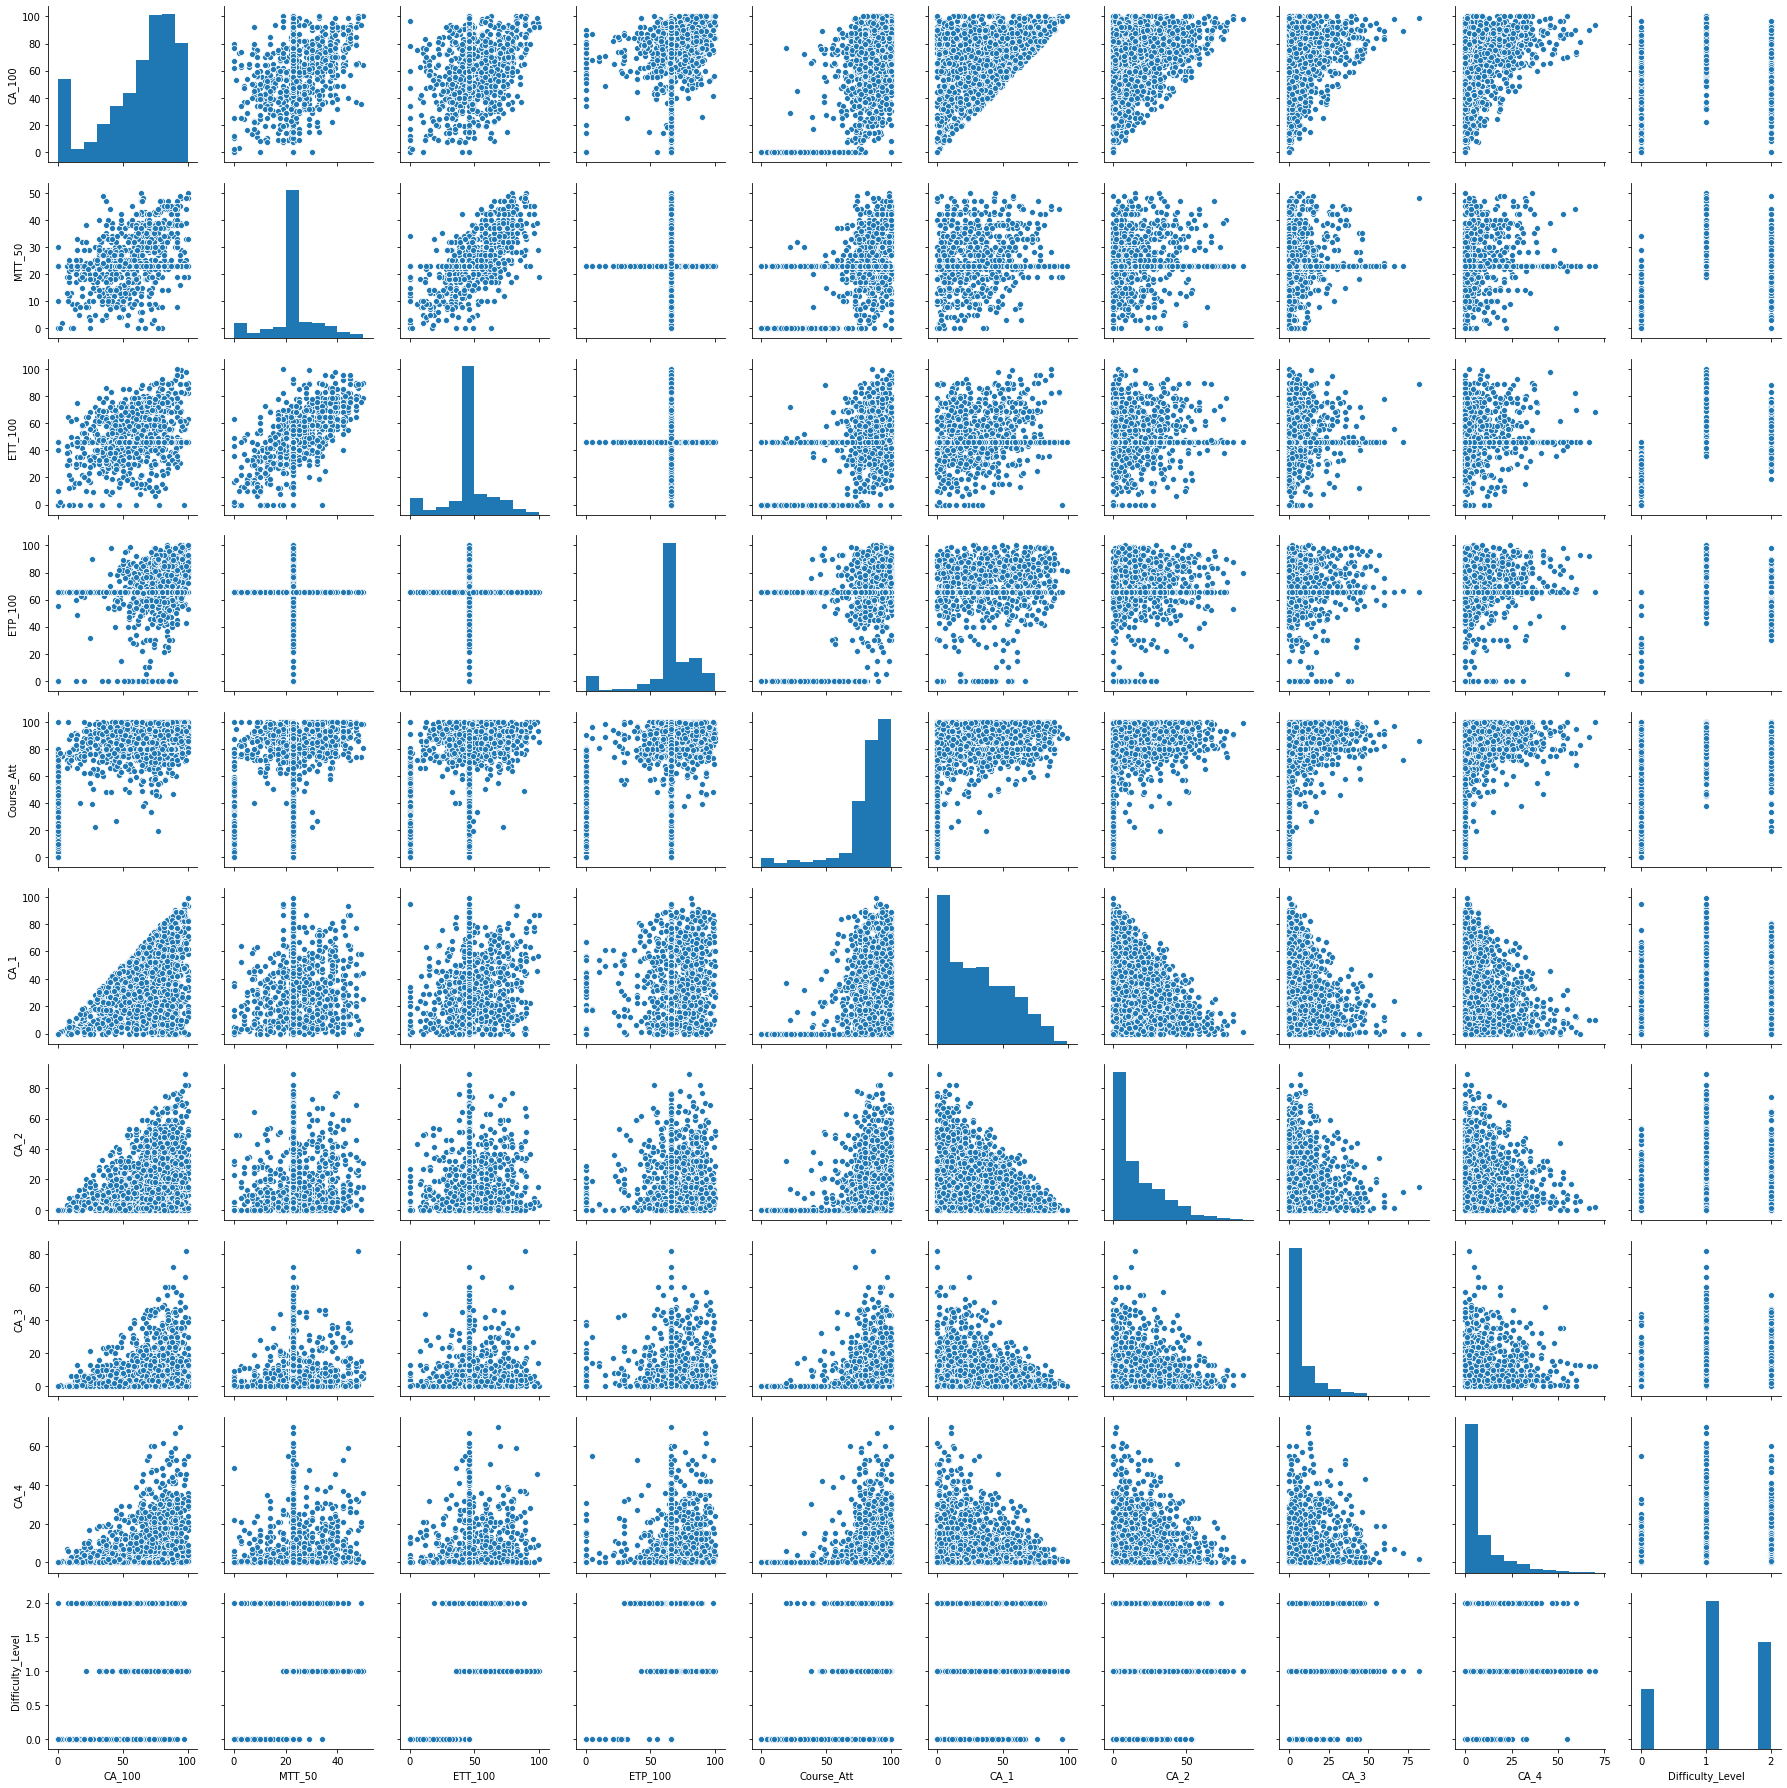

In [38]:
# Plot pairwise relationships in a dataset
import seaborn as sns
sns.pairplot(dataset)

In [39]:
dataset = dataset.values
dataset

array([[ 94.,  16.,  31., ...,  25.,   7.,   2.],
       [ 99.,  33.,  82., ...,  23.,   9.,   1.],
       [100.,  19.,  82., ...,   2.,   2.,   1.],
       ...,
       [ 14.,  20.,  30., ...,   0.,   1.,   0.],
       [ 80.,   8.,  40., ...,   7.,   2.,   2.],
       [ 43.,  27.,  34., ...,   2.,   1.,   2.]])

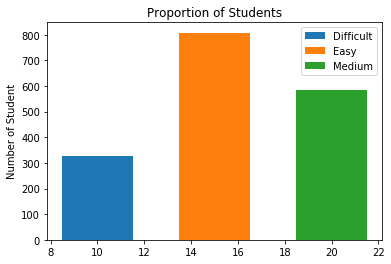

In [40]:
import matplotlib.pyplot as plt
#Plot the proportion of student with the difficulty level
Difficult = dataset[dataset[:, -1] == 0].shape[0]
Easy = dataset[dataset[:, -1] == 1].shape[0]
Medium = dataset[dataset[:, -1] == 2].shape[0]
plt.bar(10,Difficult,3, label="Difficult")
plt.bar(15,Easy,3, label="Easy")
plt.bar(20,Medium,3, label="Medium")
plt.legend()
plt.ylabel('Number of Student')
plt.title('Proportion of Students')
plt.show()

In [41]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_km = km.fit_predict(dataset[:, :-1])
y_km

array([0, 0, 0, ..., 1, 2, 2])

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_km, dataset[:, -1])
acc

0.2617801047120419

In [43]:
centroid = km.cluster_centers_
centroid

array([[79.97693575, 24.91916515, 50.23077241, 71.12402918, 87.08297367,
        59.63426689,  9.5107084 ,  5.23228995,  5.59967051],
       [ 5.27510917, 12.06100644, 21.83836534, 44.41045064, 42.26559516,
         2.25327511,  1.36681223,  0.88209607,  0.77292576],
       [64.90956156, 24.54015442, 49.26011033, 67.09668647, 85.11697505,
        19.37967174, 23.78826621, 10.72695456, 11.01466905]])

In [44]:
y_p = km.predict([[43.0, 27.000000, 34.000000, 65.496599, 77.0, 31.0, 9.0, 2.0, 1.0]])
if y_p == 0:
    print('Difficult')
elif y_p == 1:
    print('Easy')
else:
    print('Medium')

Medium


In [45]:
y_p = km.predict([[87.0,23.011553,45.949821,72.000000,90.0,80.0,1.0,1.0,5.0]])
if y_p == 0:
    print('Difficult')
elif y_p == 1:
    print('Easy')
else:
    print('Medium')

Difficult


In [46]:
y_p = km.predict([[14.0,20.000000,30.000000,65.496599,83.0,11.0,2.0,0.0,1.0]])
if y_p == 0:
    print('Difficult')
elif y_p == 1:
    print('Easy')
else:
    print('Medium')

Easy


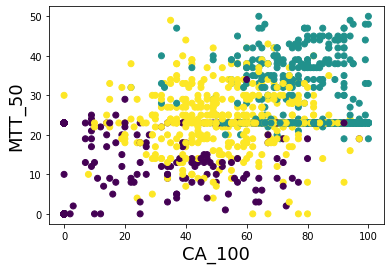

In [47]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, -1])
plt.xlabel('CA_100', fontsize=18)
plt.ylabel('MTT_50', fontsize=18)
plt.show()

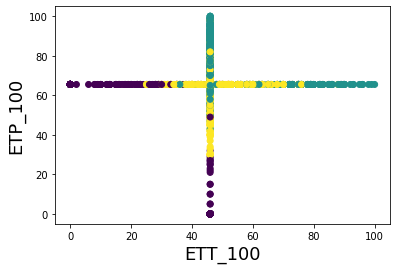

In [48]:
plt.scatter(dataset[:, 2], dataset[:, 3], c=dataset[:, -1])
plt.xlabel('ETT_100', fontsize=18)
plt.ylabel('ETP_100', fontsize=18)
plt.show()

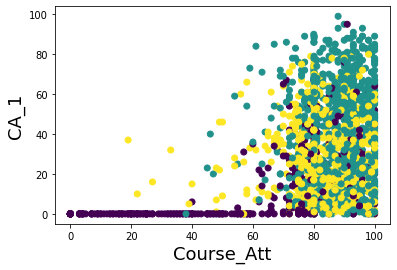

In [49]:
plt.scatter(dataset[:, 4], dataset[:, 5], c=dataset[:, -1])
plt.xlabel('Course_Att', fontsize=18)
plt.ylabel('CA_1', fontsize=18)
plt.show()

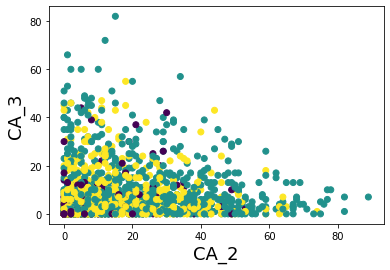

In [50]:
plt.scatter(dataset[:, 6], dataset[:, 7], c=dataset[:, -1])
plt.xlabel('CA_2', fontsize=18)
plt.ylabel('CA_3', fontsize=18)
plt.show()

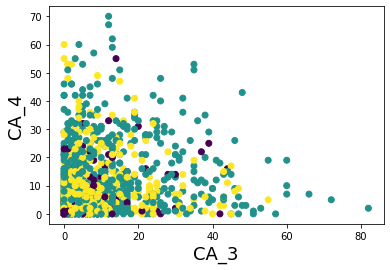

In [51]:
plt.scatter(dataset[:, 7], dataset[:, 8], c=dataset[:, -1])
plt.xlabel('CA_3', fontsize=18)
plt.ylabel('CA_4', fontsize=18)
plt.show()